# Custom Wordcloud Test
This is a test notebook to show the methods to generate custom wordclouds.
Actuall statusDV project functions and methods are hidden for security reasons.
You can access and tryout the live working webapp here at [statusDV](https://statusdv.herokuapp.com)

<span style="color:red">
    Note: All static files used in this demo have been removed from Public Repo. Only one mask example file is available for public use. Please add your custom static files in static folder for your personal uses. For inspirations, you should checkout [statusDV](https://statusdv.herokuapp.com)
</span>

### Importing dependencies

In [1]:
# importing dependencies
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from utils.status_utils import filter_words
import numpy as np
from PIL import Image

### Worcloud generator

In [2]:
def generate_wordcloud(words, pref):
    """
    returns wordcloud (PIL.Image) made from given words and pref settings.
        Args:
            words (str): string of words to be used to generate wordcloud
            pref (dict): preference dict containing custom design settings 
            for wordcloud
        Returns:
            Saves image at pref['output_filename'] and returns generated 
            wordcloud as PIL.Image
    """
    
    # if coloring pattern is provided, then read the image
    if pref['coloring_pattern']:
        coloring_image = np.array(Image.open(pref['coloring_pattern'])
                                  .resize((pref['width'], pref['height'])))
        color_func = ImageColorGenerator(coloring_image)
    else:
        color_func = None

    # if mask is given, load the mask
    mask_image = np.array(Image.open(pref['mask']).convert(pref['mode'])) if pref['mask'] else None

    # setup wordcloud with given settings
    wc = WordCloud(background_color=pref['background_color'],
                   mode=pref['mode'],
                   mask=mask_image,
                   color_func=color_func,
                   contour_width=pref['contour_width'],
                   contour_color=pref['contour_color'],
                   height=pref['height'], width=pref['width'],
                   stopwords=STOPWORDS,
                   font_path=pref['font_path'] if pref['font_path'] else None ,
                   max_words=pref['max_words'],
                   max_font_size=pref['font_size'])

    # generate wc for given text
    wc.generate(words)

    # save image
    wc.to_file(pref['output_filename'])
    
    # return wordcloud
    return wc.to_image()


### Setting up dummy data for test

In [3]:
# pref dict for coloring and mask images
dummy_pref = {
    'text': None,
    'background_color': "white",
    'coloring_pattern': None,
    'mode': "RGB",
    'mask': None,
    'contour_width': 0,
    'contour_color': None,
    'height': 400,
    'width': 400,
    'font_path': None,
    'font_size':None,
    'max_words': None,
    'output_filename': 'build_output/test_output.png',
}

# load dummy_words
with open('static/status.txt') as fh: # add file path to your dummy text
    dummy_pref['text'] = filter_words(''.join(fh.readlines())) # filter text

### Simple wordcloud with default settings

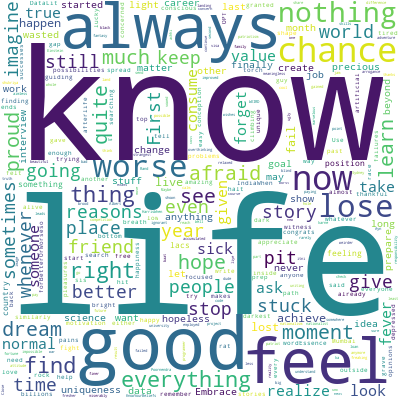

In [4]:
# call generate_wordcloud with default settings
generate_wordcloud(words=dummy_pref['text'], pref=dummy_pref)

### Using Color patterns

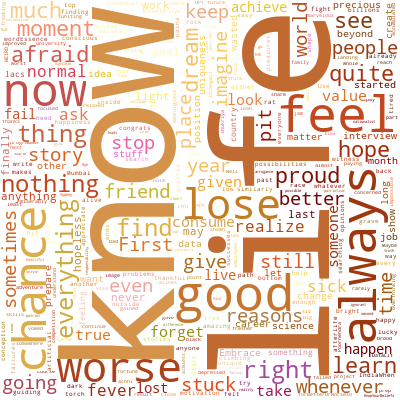

In [5]:
dummy_pref['coloring_pattern'] = 'static/color.jpg'  # set image file path which will be used to generate colors
dummy_pref['output_filename'] = 'build_output/test_color_output.png'
generate_wordcloud(words=dummy_pref['text'], pref=dummy_pref)

### Using Mask without borders

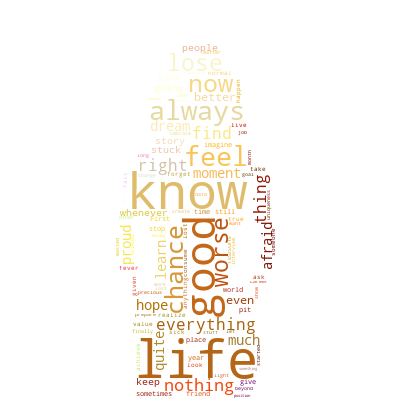

In [6]:
dummy_pref['mask'] = 'static/mask.png' # set mask file
dummy_pref['output_filename'] = 'build_output/test_mask_output.png'
generate_wordcloud(words=dummy_pref['text'], pref=dummy_pref)

### Using Mask with Outlines

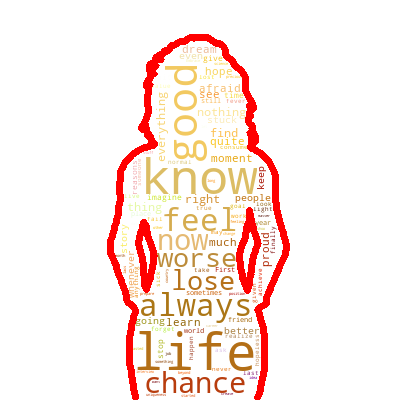

In [7]:
dummy_pref['contour_color'] = 'red'  # set outlines color
dummy_pref['contour_width'] = 10 # set outlines thickness
generate_wordcloud(words=dummy_pref['text'], pref=dummy_pref)

In [8]:
# Reset borders
dummy_pref['contour_color'] = None #reset outline
dummy_pref['contour_width'] = 0

### Using Custom Fonts

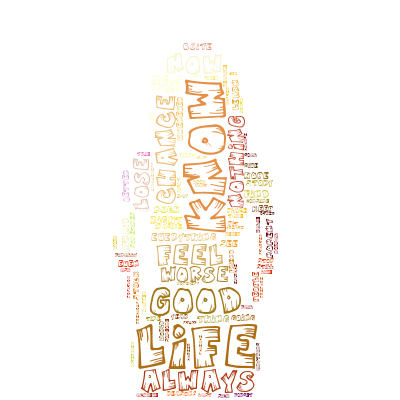

In [9]:
dummy_pref['font_path'] = 'static/font.TTF'   # set path for your font
dummy_pref['output_filename'] = 'build_output/test_fonts_output.png'
generate_wordcloud(words=dummy_pref['text'], pref=dummy_pref)

### Using different background color

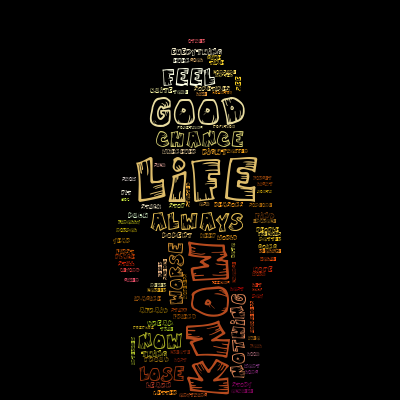

In [10]:
dummy_pref['background_color'] = 'black' #set background color
generate_wordcloud(words=dummy_pref['text'], pref=dummy_pref)

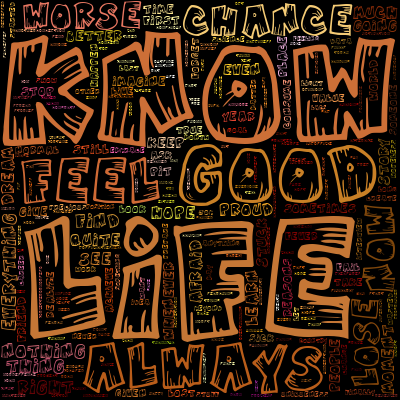

In [12]:
dummy_pref['mask'] = None # reset mask
dummy_pref['output_filename'] = 'build_output/test_background_output.png'
generate_wordcloud(words=dummy_pref['text'], pref=dummy_pref)